# Proyecto 2 - Algoritmo del Vendedor Viajero


## <span style="color:blue">1. Pregunta de Investigación:</span>.

¿Cómo se compara el desempeño del algoritmo simulated annealing con el desempeño del algoritmo genético en la resolución del problema del vendedor viajero para 17 localidades en Costa Rica?

### <span style="color:blue">Problema:</span>.

El problema del vendedor viajero se trata de crear un algoritmo que busque la ruta más óptima entre una cantidad *"n"* de ciudades visitando cada ciudad exactamente una vez y finalizando la ruta en la ciudad donde comenzó.Para solucionar este problema se pueden utilizar numerosos diferentes tipos de algoritmos, sin embargo, para esta investigacion se utilizarán dos tipos de algoritmos diferentes , el primero será un algoritmo de simulated annealing y el segundo un algoritmo genético.

### <span style="color:blue">Alcances y Delimitaciones:</span>.

El vendedor viajero es un problema NP-completo, lo cual nos indica que es signifactivamente dificil de resolver, el poder de computacion requerido para trabajar este tipo de problemas combinatorios con fuerza bruta o inclusive metodos sistematicos como el backtracking es sumamente alto. Los algoritmos probabilisticos como los que vamos a utilizar en esta investigacion ofrecen una alternativa mas accesible en relacion al poder computacional requerido, sin embargo, esta ventaja no es de gratis ya que se sacrifica un poco en la calidad de la solucion dada por el algoritmo, no obstante, es lo suficientemente buena.

El desarollo y refinamiento de algoritmos como estos nos permite realizar problemas sumamente complejos con menos recursos. 

### <span style="color:blue">Hipótesis:</span>.


*  Al realizar estudios sobre algoritmos metaheurísticos como lo son el simulated annealing (enfriamiento simuldo en español) y algoritmos genéticos es importante generar un balance entre la intensidad de las búsquedas así como la diversificacion que estas pueden tener, es decir, se debe encontrar un resultado con un equilibrio entre la cantidad de esfuerzo realizado para búsquedas locales y globales. Esto con el fin de encontrar regiones con soluciones favorables y no malgastar tiempo en regiones no tan prometedoras o ya exploradas.


### <span style="color:blue">3. Metodología:</span>.


Para analizar estos diferentes algoritmos probabilísticos se realizaran pruebas empiricas mediante experimentos establecidos, estos van a consistir principalmente en el analisis de la complejidad temporal en relacion a la calidad de la solucion variando los parametros de entrada en cada algoritmo. 

### <span style="color:blue">Procedimiento a Seguir:</span>.

Sobre cada uno de los algoritmos se realizarán una serie de pruebas empíricas que nos permitan estudiarlos debidamente y analizarlos junto con los datos teóricos existentes. Para cada una de estas pruebas se graficará la curva de comportamiento de cada una de las pruebas, para las cuales utilizaremos el modulo unittest el cual forma parte de una serie de frameworks conocidos como xUnit, con el modulo tenemos la posibilidad de crear pruebas en el propio código implementando la clase llamada unittest.TestCase en la que se incluyen las pruebas.
Las pruebas pueden devolver tres respuestas las cuales son: 
*    OK: Indica que la prueba se ha pasado éxitosamente.
*    FAIL: Indica que la prueba no ha pasado éxitosamente, se puede lanzar una excepción AsertionError (sentencia verdadero-falso) 
*    ERROR: Indica que la prueba no ha pasado éxitosamente, pero el resultado en lugar de aserción es otro errror.

Vamos a usar también el método assertTrue(x) el cual comprueba que bool(x) is True Los experimentos se especifican a continuación:

### <span style="color:blue">Diseno de experimentos</span>.


####  $\color{blue}{\text{→  Experimento 1:}}$

* El experimento 1 consiste en realizar una comparación entre la complejidad temporal y la calidad de soluciones encontradas por el algoritmo simulated anealing. Se clasificará la calidad de estas soluciones (excelentes, buenas, aceptables o malas). En este experimento se realizara una variacion en la tasa de enfiamiento del algoritmo en un rango de 50-100 y avanzando de cinco en cinco se ejecutarán 5 corridas del algoritmo por cada valor. A continuacion se muestran los parametros relevantes para este experimento. Finalmente se probaran tres valores de temperatura; un valor alto, uno medio y otro bajo. 

    #####  Dominio

    ciudades_rutacsv = datos/ciudades_cr.csv'

    ciudad_inicio = Alajuela

    #####  Simulated Anealing

    temperatura = `[10e8, 10e16, 10e32]`

    tasa_enfriamiento = variable
    
    
####  $\color{blue}{\text{→  Experimento 2:}}$

* El experimento 2 consiste en variar los parametros de el algoritmo genetico, esto lo vamos a hacer cambiando los valores del tamano de poblacion, porcentaje elite, probabilidad de mutacion y las repeticiones. 

    #####  Dominio

    ciudades_rutacsv = datos/ciudades_cr.csv'

    ciudad_inicio = Alajuela

    #####  Algoritmo Genetico

    tam_poblacion = 100

    porc_elite = 0.1

    prob_mult = 0.5

    reps = 1000

####  $\color{blue}{\text{→  Experimento 3:}}$

* El experimento 3 consiste en la comparacion directa de la complejidad temporal y la calidad de la solucion entre el algoritmo genetico y el simulated anealing utilizando los mejores parametros encontrados en los experimentos anteriores. 

### <span style="color:blue">Especificaciones del equipo</span>.


Adicionalmente, como bien es sabido, existen una gran cantidad de factores que afectan el rendimiento de cada algoritmo, como lo es, por ejemplo, los recursos disponibles que tenga la máquina para el estudio, compilador e inclusive el lenguaje de programación de estos algoritmos. Es por ello que es importante detallar las especificaciones que estas tienen, y en este caso son las siguientes: 

    -Lenguaje de Programación: Python 3.  
    -Compilador: Jupyter Python.  
    -Procesador: Intel Core i7 de 4ta Generación.  
    -Sistema Operativo: Ubuntu Linux 18.04.5 LTS de 64 bits.  
    -Memoria RAM: 32 Gb.  


### <span style="color:blue">Representación:</span>.


Para la graficación de los resultados vamos a utilizar la biblioteca matplotlib.


In [7]:
from math import log

xs = range(1, 100)
ys_1 = [x ** 2.01 for x in xs]
ys_2 = [x ** 2 for x in xs]

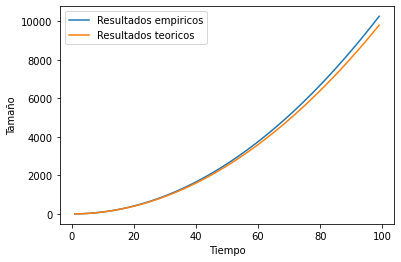

In [8]:
import matplotlib.pyplot as plt

plt.plot(xs, ys_1, label = 'Resultados empiricos')
plt.plot(xs, ys_2, label = 'Resultados teoricos')
plt.ylabel('Tamaño')
plt.xlabel('Tiempo')
plt.legend(loc = 2)
plt.show()

El gráfico anterior solo es una representación no significativa de los graficos y comparaciones que vamos a estar haciendo durante este análisis. 

### $\color{ForestGreen}{\text{Algoritmos a Utilizar:}}$
A continuación se muestra al detalle los algoritmos que se van a utilizar para estas pruebas.


### $\color{ForestGreen}{\text{✰- Algoritmo Genético:}}$

In [9]:
import random as rand

def optimizar(dominio, tam_pobl, porc_elite, prob_mut, reps):
    """Algoritmo genetico para optimizacion estocoastica."""

    poblacion = dominio.generar_n(tam_pobl)
    
    while reps > 0:

        genomas = []
        for sol in poblacion:                       
            aptitud = dominio.fcosto(sol)
            genoma = (sol, aptitud)
            genomas.append(genoma)

        genomas.sort(key=lambda x: x[1])

        for i in range(len(genomas)):
            poblacion[i] = genomas[i][0]

        num_padres = int(len(poblacion) * porc_elite)
        num_hijos = int(len(poblacion) - num_padres)
        sig_gen = poblacion[0:num_padres]
        descendencia = []

        while num_hijos > 0:
            
            x = rand.randrange(0, len(sig_gen))
            y = rand.randrange(0, len(sig_gen))

            while x == y:

                x = rand.randrange(0, len(sig_gen))
                y = rand.randrange(0, len(sig_gen))

            padre_a = sig_gen[x]
            padre_b = sig_gen[y]

            hijo = dominio.cruzar(padre_a, padre_b)
            p = rand.uniform(0, 1)

            if p <= prob_mut:
                hijo = dominio.mutar(hijo)
            descendencia.append(hijo)
            num_hijos = num_hijos - 1

        
        sig_gen += descendencia
        poblacion = sig_gen
        reps = reps - 1

    return poblacion[0]

### $\color{ForestGreen}{\text{✰- Enfriamiento Simulado:}}$

In [13]:
import math
import random


def optimizar(dominio, temperatura = 10e32, tasa_enfriamiento = 0.95):
    """Algoritmo de optimizacion estocastica simulated annealing. """

    solucion = dominio.generar()                                    #genera una solucion al azar
    costo = dominio.fcosto(solucion)                                #se calcula el costo de dicha solucion
    
    while temperatura > 0.01:
        
        solucionP = dominio.vecino(solucion)                        #genera una solucion vecina al azar
        costoP = dominio.fcosto(solucionP)                          #se calcula el costo de la solucion vecina

        p = (math.exp(-(abs(costoP-costo))) ) / temperatura         #math.exp eleva E a la potencia indicada
                                                                    #abs = valor absoluto
        pAzar = random.uniform(0,1)                                 #random.uniform retorna un valor intermedio entre 0 y 1 
                                                                    #de distribucion uniforme
        
        if costoP<costo or pAzar<=p:
            solucion = solucionP
            costo = costoP
        
        temperatura= temperatura * tasa_enfriamiento
    
    return solucion

Antes de empezar con la reproducción de experimentos vamos a importar algunas funciones necesarias para ejecutar las pruebas y los algoritmos que vamos a usar:

In [1]:
from additional_functions import *

### <span style="color:ForestGreen">Reproducción de Experimentos:</span>.

   #### Experimento 1 (TEMPERATURA = 10E8)

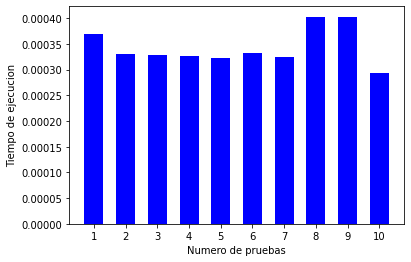

In [2]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.50)
tiempo_sa_10e8_50 = resultado[0]
sol_sa_10e8_50 = resultado[1]

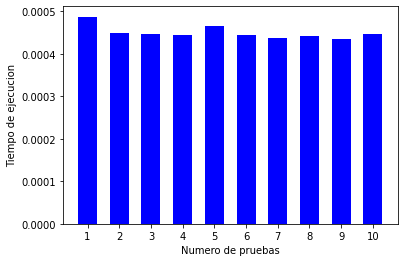

In [3]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.60)
tiempo_sa_10e8_60 = resultado[0]
sol_sa_10e8_60 = resultado[1]

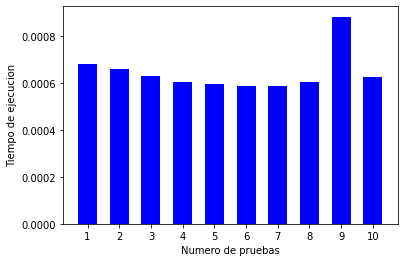

In [4]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.70)
tiempo_sa_10e8_70 = resultado[0]
sol_sa_10e8_70 = resultado[1]

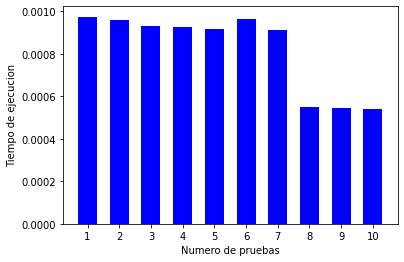

In [5]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.80)
tiempo_sa_10e8_80 = resultado[0]
sol_sa_10e8_80 = resultado[1]

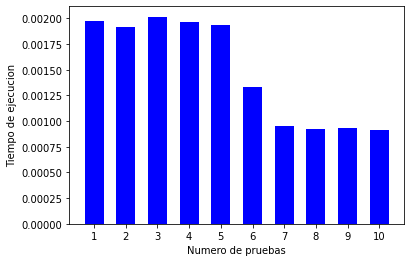

In [6]:
resultado = calcular_tiempos_sa(10, 'Alajuela', 10e8, 0.90)
tiempo_sa_10e8_90 = resultado[0]
sol_sa_10e8_90 = resultado[1]

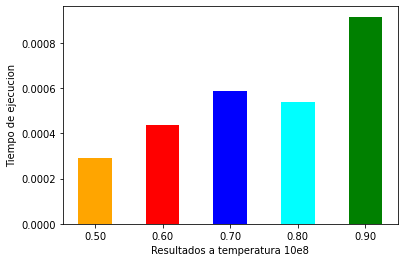

In [7]:
resultados_10e8 = [tiempo_sa_10e8_50, tiempo_sa_10e8_60, tiempo_sa_10e8_70, tiempo_sa_10e8_80, tiempo_sa_10e8_90]
comparar_resultados_tiempo(resultados_10e8, '10e8')

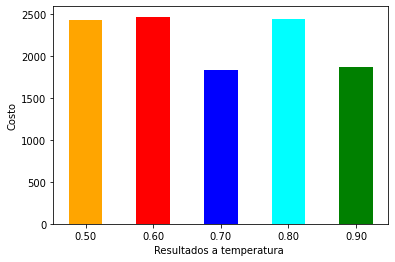

In [8]:
resultados = [sol_sa_10e8_50, sol_sa_10e8_60, sol_sa_10e8_70, sol_sa_10e8_80, sol_sa_10e8_90]
comparar_resultados_costo(resultados)

   #### Experimento 1 (TEMPERATURA = 10E16)

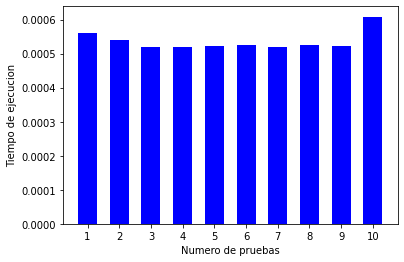

In [8]:
tiempo_sa_10e16_50 = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.50)

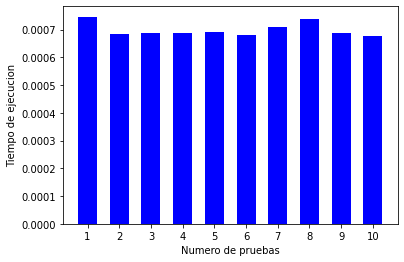

In [9]:
tiempo_sa_10e16_60 = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.60)

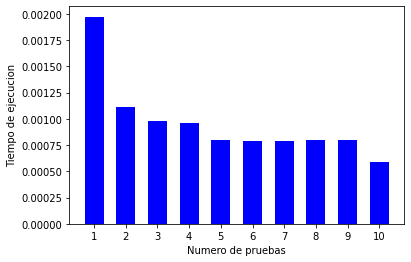

In [10]:
tiempo_sa_10e16_70 = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.70)

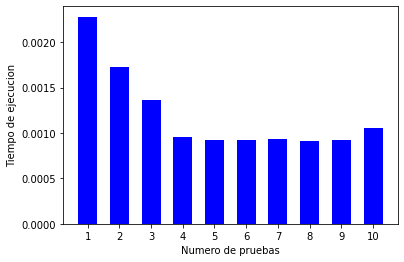

In [11]:
tiempo_sa_10e16_80 = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.80)

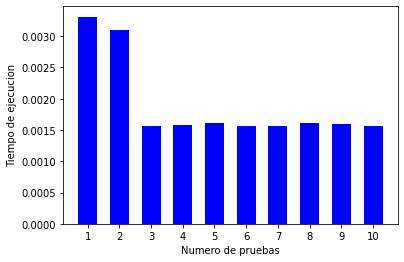

In [12]:
tiempo_sa_10e16_90 = calcular_tiempos_sa(10, 'Alajuela', 10e16, 0.90)

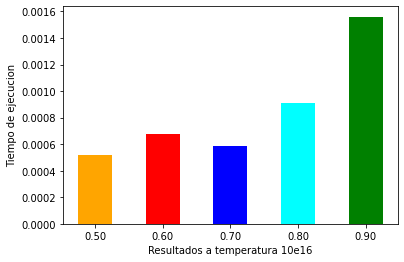

In [13]:
resultados_10e16 = [tiempo_sa_10e16_50, tiempo_sa_10e16_60, tiempo_sa_10e16_70, tiempo_sa_10e16_80, tiempo_sa_10e16_90]
comparar_resultados(resultados_10e16, '10e16')

   #### Experimento 1C: 50 soluciones: 

In [ ]:
clase, datos_3_AG_exp_1 = big_o(AGTest.test_optimizar(self) 
                     unittest.TestCase,
                     min_n=1, max_n=100,
                     n_measures=100, n_repeats=5,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

 ### $\color{ForestGreen}{\text{ → Simulated Annealing:}}$       
   #### Experimento 1D: 10 soluciones: 

In [ ]:
clase, datos_1_SA_exp_1 = big_o(SATest.test_optimizar(self) 
                     unittest.TestCase,
                     min_n=1, max_n=100,
                     n_measures=100, n_repeats=5,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

#### Experimento 1E: 30 soluciones: 

In [ ]:
clase, datos_2_SA_exp_1 = big_o(SATest.test_optimizar(self) 
                     unittest.TestCase,
                     min_n=1, max_n=100,
                     n_measures=100, n_repeats=5,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

#### Experimento 1F: 50 soluciones: 

In [23]:
clase, datos_3_SA_exp_1 = big_o(SATest.test_optimizar(self) 
                     unittest.TestCase,
                     min_n=1, max_n=100,
                     n_measures=100, n_repeats=5,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

SyntaxError: invalid syntax (<ipython-input-23-57353fcbde50>, line 2)

### $\color{ForestGreen}{\text{Reproducción de Experimentos:}}$


### $\color{ForestGreen}{\text{Experimento #2:}}$
* Se estudiará la cantidad de parámetros necesarios para que los algoritmos de enfriamiento simulado y algoritmo genético funcionen de la mejor manera. Para ello, se definirán diferentes rangos de parámetros y se estudiará el tiempo que demora en encontrar soluciones con dichas cantidades de parámetros.
 ### $\color{ForestGreen}{\text{ → Algoritmo Genético:}}$   
 
 #### Experimento 2A: (0 - 10 parámetros)

 #### Experimento 2B: (10- 20 parámetros)

 #### Experimento 2C: (20 - 30 parámetros)

 ### $\color{ForestGreen}{\text{ → Simulated Annealing:}}$       
   #### Experimento 2D: (0 - 10 parámetros)

   #### Experimento 2E: (10 - 20 parámetros)

   #### Experimento 2F: (20 - 30 parámetros)

### $\color{blue}{\text{ 4. Análisis de Resultados:}}$


### $\color{blue}{\text{ 5. Conclusiones:}}$